<a href="https://colab.research.google.com/github/abhi-lejon/Machine-learning/blob/master/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category='FutureWarning')

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data.csv',encoding = 'unicode_escape')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Here from the initial understanding after looking the data, it contains both item and customer data.
#So each cannot be diffrentiated by customer or item. but by telling thi sitem is purchased by this customer.

In [ ]:
#But for segmentation we need to focus on Customer centric.
#Our job is to achieve customer-centric data, where each new row represents a unique customer whose attributes are listed in other columns.

In [ ]:
df.CustomerID.nunique() #As we have 4372 customer, so our final data should also have 4372 rows.

4372

In [ ]:
#Lets check for missing values.
len(df)-len(df.dropna()) #This are the rows that would be dropped if we have deleted any row that as na.

135080

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#As Customer ID is missing, we can impute by using KNN or decision trees.
#But imputing with median or other things wont work as the nature of customer id.
#If we are computing the customer id then we need to be using high variance algorithm as the no of classes are more.

In [ ]:
#But here lets drop the 

In [ ]:
#df_pred=df[['StockCode','InvoiceNo','CustomerID']]

In [ ]:
#x=df_pred.iloc[:,:2]
#y=pd.DataFrame(df_pred.CustomerID)

In [ ]:
#Lets drop the rows in out example
df=df.dropna(axis=0,how='any')
df.shape

(406829, 8)

In [ ]:
#Invoice No and stock code are irrelevant, so lets drop them.
df.drop(['InvoiceNo','StockCode'],axis=1,inplace=True)

In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
import re
def clean(description):
  return re.sub(r'[^\w\s]','',description).lower()

In [ ]:
df['Description']=df['Description'].apply(clean)

In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df=df.reset_index().drop('index',axis=1)

In [ ]:
#Lets create a new column Total.
df['Total']=df['Quantity']*df['UnitPrice']

In [ ]:
#Lets vectorize the description
#We can use TF-IDF vectorizer or Bag of words.
#But as we are using data set lets go for bag of words.
#Bag of words - is a way of extracting features from text for use in modeling,
#which is more suited for long texts that have more redundant words. 
#It seems that every word in the description is a keyword of sorts, so vectorizing it simply with bag of words/count is the best way to go.

In [ ]:
!pip install numpy scipy joblib scikit-learn --force-reinstall

  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/85/b00f13b52d079b5625e1a12330fc6453c947a482ff667a907c7bc60ed220/scipy-1.7.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: datascience 0.10

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english') #Creating the object for count vectorizer and removing the stop words.

In [ ]:
descriptions=vectorizer.fit_transform(df['Description'])
descriptions

<406829x2093 sparse matrix of type '<class 'numpy.int64'>'
	with 1640936 stored elements in Compressed Sparse Row format>

In [ ]:
#Lets create the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(descriptions) #we are creating clusters based on descriptions.

KMeans(n_clusters=5)

In [ ]:
kmeans.labels_

array([1, 1, 3, ..., 3, 3, 0], dtype=int32)

In [ ]:
df['product']=kmeans.labels_

In [ ]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,1
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,3
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,3
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1


In [ ]:
#But we need customer centric data which is quite difficult. Lets create the new data frame customer.
#Currently, its only column will be unique values for CustomerID.

In [ ]:
customers=pd.DataFrame({'CustomerID':df['CustomerID'].unique()})

In [ ]:
customers.shape

(4372, 1)

In [ ]:
#Now we have got Customers, based on the cluster created based on the description we create new columns.
customers['product 0']=0
customers['product 1']=0
customers['product 2']=0
customers['product 3']=0
customers['product 4']=0

In [ ]:
customers.head()

,CustomerID,product 0,product 1,product 2,product 3,product 4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [ ]:
from tqdm import tqdm
for index in tqdm(range(len(df))):
    customerID = df.loc[index,'CustomerID']
    product_category = df.loc[index,'product']
    product_price = df.loc[index,'Total']
    customers_table_index = customers[customers['CustomerID']==customerID].index[0]
    customers.loc[customers_table_index, 'product'+' '+str(product_category)] += product_price

100%|██████████| 406829/406829 [05:06<00:00, 1327.23it/s]


In [ ]:
#tqdm is a python progress-tracking library that can help us gauge where the iteration is at during long loops. The index will allow us to index certain columns.

In [ ]:
# The row whose customer ID matches the one we want to target’s product column has the product price added to it.

In [ ]:
#Creating Purchase History Descriptions
#Creating purchase history description, like max, min, count, avg, sum.
customers['purchasecount']=0
customers['purchasemin']=0
customers['purchasemax']=0
customers['purchaseavg']=0
customers['purchasesum']=0

Let’s walk through the logic of what we want to do here. For each unique customer, we want to access all the (total) purchases that they’ve made. From there, if the history is stored in a NumPy array or a Pandas Series, attributes like the count, minimum, maximum, etc. can be easily called.

In [ ]:
from tqdm import tqdm
for index in tqdm(range(len(customers))):
  customerID=customers.loc[index,'CustomerID']
  history=df[df['CustomerID']==customerID]['Total']
  customers.loc[index,'purchasecount']=history.count()
  customers.loc[index,'purchasemax']=history.max()
  customers.loc[index,'purchasemin']=history.min()
  customers.loc[index,'purchaseavg']=history.mean()
  customers.loc[index,'purchasesum']=history.sum()

100%|██████████| 4372/4372 [00:12<00:00, 343.88it/s]


In [ ]:
customers.head()

,CustomerID,product 0,product 1,product 2,product 3,product 4,purchasecount,purchasemin,purchasemax,purchaseavg,purchasesum
0,17850.0,321.30,1506.44,0.0,3372.99,87.90,312,-30.60,107.25,16.950737,5288.63
1,13047.0,518.38,161.06,0.0,2399.66,0.00,196,-15.00,68.00,15.709694,3079.10
2,12583.0,1228.14,0.00,424.9,4932.28,602.02,251,-60.84,132.80,28.634821,7187.34
3,13748.0,52.08,34.30,0.0,861.87,0.00,28,9.36,204.00,33.866071,948.25
4,15100.0,0.00,0.00,0.0,635.10,0.00,6,-131.40,350.40,105.850000,635.10


In [ ]:
#We want to know if a customer is from the UK or not. This is simple enough — we’ll use the trusty set-and-input method.

In [ ]:
customers['Foreign'] = 0

In [ ]:
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    customerCountry = df[df['CustomerID']==customerID] .reset_index().loc[0,'Country']
    if customerCountry == 'United Kingdom':
        customers.loc[index,'Foreign'] = 0
    else:
        customers.loc[index,'Foreign'] = 1

100%|██████████| 4372/4372 [00:09<00:00, 466.33it/s]


In [ ]:
customers.head()

,CustomerID,product 0,product 1,product 2,product 3,product 4,purchasecount,purchasemin,purchasemax,purchaseavg,purchasesum,Foreign
0,17850.0,321.30,1506.44,0.0,3372.99,87.90,312,-30.60,107.25,16.950737,5288.63,0
1,13047.0,518.38,161.06,0.0,2399.66,0.00,196,-15.00,68.00,15.709694,3079.10,0
2,12583.0,1228.14,0.00,424.9,4932.28,602.02,251,-60.84,132.80,28.634821,7187.34,1
3,13748.0,52.08,34.30,0.0,861.87,0.00,28,9.36,204.00,33.866071,948.25,0
4,15100.0,0.00,0.00,0.0,635.10,0.00,6,-131.40,350.40,105.850000,635.10,0


In [ ]:
#Our data is ready, now letrs create the clusters. Before that we need to scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers) #It will be numpy array.

In [ ]:
scaled_customers=pd.DataFrame(scaled_customers,columns=customers.columns)
scaled_customers.head()

,CustomerID,product 0,product 1,product 2,product 3,product 4,purchasecount,purchasemin,purchasemax,purchaseavg,purchasesum,Foreign
0,1.480857,0.113867,0.822853,-0.122800,0.424056,-0.078515,0.941929,0.019410,-0.027050,-0.093381,0.412510,-0.326857
1,-1.308028,0.291915,-0.038868,-0.122800,0.232953,-0.156847,0.442886,0.024834,-0.040674,-0.103129,0.143658,-0.326857
2,-1.577452,0.933130,-0.142027,0.442666,0.730206,0.379643,0.679501,0.008896,-0.018181,-0.001604,0.643541,3.059443
3,-0.900989,-0.129353,-0.120058,-0.122800,-0.068975,-0.156847,-0.279865,0.033304,0.006533,0.039487,-0.115620,-0.326857
4,-0.115944,-0.176403,-0.142027,-0.122800,-0.113499,-0.156847,-0.374511,-0.015637,0.057349,0.604912,-0.153723,-0.326857


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_nums=[2,3,4,5,6,7]
scores=[]
for cluster_num in cluster_nums:
  kmeans=KMeans(cluster_num)
  kmeans.fit(scaled_customers)
  clusters=kmeans.predict(scaled_customers)
  silhouette = silhouette_score(scaled_customers, clusters)
  scores.append(silhouette)

In [ ]:
scores

[0.9477428990738933,
 0.9521900635092116,
 0.601552909663087,
 0.6140448314014354,
 0.42199512614474693,
 0.42209851918359464]

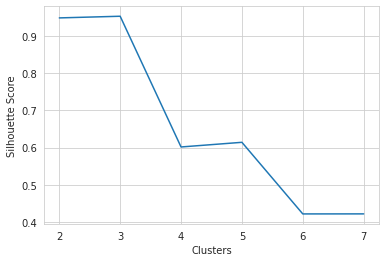

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)

2 and 3 clusters seem to have a similarly high silhouette score. We’ll use three clusters for now. We can train a three-cluster model for our cluster centers.

In [ ]:
kmeans = KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [ ]:
#Analysis
kmeans.cluster_centers_

array([[ 1.51397609e-01, -4.84773573e-02, -1.91813916e-02,
        -2.69208702e-02, -3.81458550e-02, -1.82224110e-02,
        -7.91679886e-03, -2.49629482e-05, -1.41488038e-03,
        -2.51859782e-03, -3.87629122e-02, -3.26856915e-01],
       [ 1.73637008e-01,  1.94738387e+01,  1.62537333e+01,
         1.23809712e+01,  1.95473542e+01,  9.84938910e+00,
         7.00296290e+00, -4.99816459e-01,  1.05045720e+00,
         1.57298034e+00,  2.03016112e+01,  1.60817143e+00],
       [-1.43249239e+00,  1.31634590e-01, -9.10698094e-02,
         4.68657322e-02,  3.28473919e-02,  7.12471886e-03,
        -4.25194622e-02,  8.60584682e-03, -4.23126211e-03,
        -2.55970528e-03,  2.60429100e-02,  3.05944269e+00]])

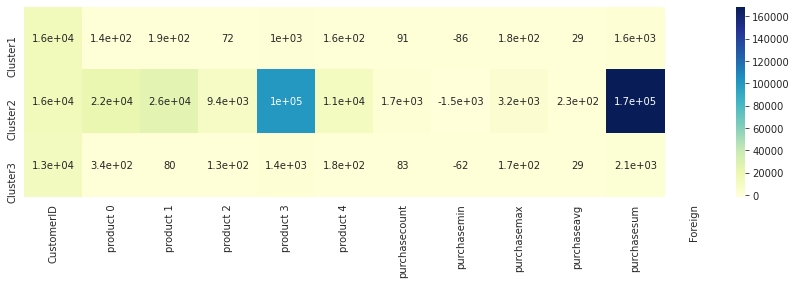

In [ ]:
plt.figure(figsize=(15,3.5))
sns.heatmap(scaler.inverse_transform(kmeans.cluster_centers_)
[:,0:11],annot=True,yticklabels=['Cluster1','Cluster2','Cluster3'],xticklabels=scaled_customers.columns,cmap="YlGnBu")